In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
import torchvision.models as models
from VWGAN import Generator, Discriminator, PixelNetwork, vwgan_loss
from load import WatermarkDataset
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from PIL import Image



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
gen_save = "generator_fixed_loss_1.pt"
dis_save = "discriminator_fixed_loss_1.pt"

In [31]:
ratio = 0.8  # the fraction of the dataset to use for the first subset
dataset = WatermarkDataset('logos_rendered', WatermarkDataset.VWGAN_MODE, scale_im=True)
lengths = [int(np.ceil(len(dataset) * ratio)), len(dataset) - int(np.ceil(len(dataset) * ratio))]

train_images, val_images = torch.utils.data.random_split(dataset, lengths)



loader = torch.utils.data.DataLoader(train_images, batch_size=5, shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_images, batch_size=1, shuffle=True, num_workers=1)

# create instances of the generator, discriminator, and pixel network
generator = Generator().to(device)
discriminator = Discriminator().to(device)
pixel_network = PixelNetwork().to(device)

# define the optimizer for the generator and discriminator
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# define the number of epochs and batch size
num_epochs = 101
batch_size = 32

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 1, generator loss: 996.8898335844278, discriminator loss: 972.6171006411314


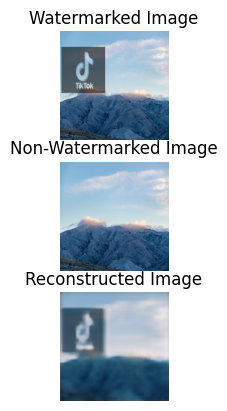

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 2, generator loss: 1454.911526441574, discriminator loss: 1442.789233982563


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 3, generator loss: 1533.8417294621468, discriminator loss: 1529.6880812048912


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 4, generator loss: 1575.5870825052261, discriminator loss: 1571.0845103859901


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 5, generator loss: 1641.5221869945526, discriminator loss: 1627.673953473568


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 6, generator loss: 1702.5564669966698, discriminator loss: 1683.4211151599884


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 7, generator loss: 1752.5545696020126, discriminator loss: 1726.9680693149567


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 8, generator loss: 1795.026590704918, discriminator loss: 1763.2818965315819


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 9, generator loss: 1822.6943356394768, discriminator loss: 1783.4141881465912


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 10, generator loss: 1845.1714106202126, discriminator loss: 1799.2575186491013


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 11, generator loss: 1873.302783370018, discriminator loss: 1822.4357889294624


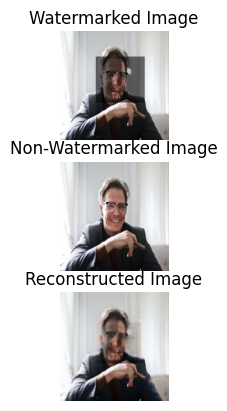

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 12, generator loss: 1896.4666857719421, discriminator loss: 1840.2119126319885


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 13, generator loss: 1911.0864815115929, discriminator loss: 1848.8944154977798


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 14, generator loss: 1926.7926489114761, discriminator loss: 1859.8874197006226


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 15, generator loss: 1943.7951146364212, discriminator loss: 1872.8572779893875


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 16, generator loss: 1958.5183173418045, discriminator loss: 1883.3569567203522


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 17, generator loss: 1968.2991619110107, discriminator loss: 1888.9213132858276


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 18, generator loss: 1979.4667526483536, discriminator loss: 1896.0571857690811


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 19, generator loss: 1989.2929087877274, discriminator loss: 1902.3455517292023


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 20, generator loss: 1998.5930058956146, discriminator loss: 1907.8281509876251


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 21, generator loss: 2005.6183862686157, discriminator loss: 1911.7171025276184


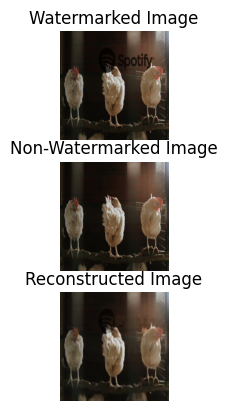

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 22, generator loss: 2011.8653024435043, discriminator loss: 1915.1948804855347


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 23, generator loss: 2019.9641513824463, discriminator loss: 1919.937368273735


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 24, generator loss: 2026.7887524366379, discriminator loss: 1925.158029794693


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 25, generator loss: 2035.8955514431, discriminator loss: 1930.972127199173


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 26, generator loss: 2044.1872721910477, discriminator loss: 1935.634146809578


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 27, generator loss: 2052.069189310074, discriminator loss: 1941.706289768219


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 28, generator loss: 2060.5207188129425, discriminator loss: 1947.334723830223


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 29, generator loss: 2069.3363449573517, discriminator loss: 1952.663244009018


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 30, generator loss: 2073.8375619649887, discriminator loss: 1955.328132390976


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 31, generator loss: 2079.6640070676804, discriminator loss: 1959.0888741016388


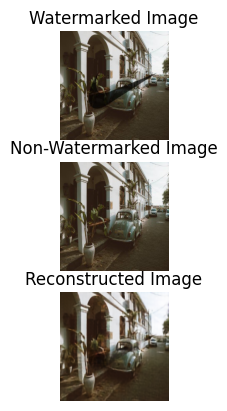

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 32, generator loss: 2088.098355293274, discriminator loss: 1965.013288140297


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 33, generator loss: 2096.3187203407288, discriminator loss: 1971.1005364656448


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 34, generator loss: 2108.361485362053, discriminator loss: 1980.4479647874832


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 35, generator loss: 2117.529725790024, discriminator loss: 1987.4175292253494


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 36, generator loss: 2126.896800994873, discriminator loss: 1994.5663114786148


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 37, generator loss: 2134.50684094429, discriminator loss: 1999.3500183820724


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 38, generator loss: 2139.7867136001587, discriminator loss: 2002.935198187828


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 39, generator loss: 2147.0137679576874, discriminator loss: 2007.4322855472565


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 40, generator loss: 2151.374484539032, discriminator loss: 2010.031814813614


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 41, generator loss: 2155.197159051895, discriminator loss: 2012.348735332489


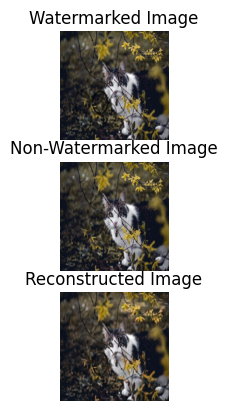

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 42, generator loss: 2160.781252503395, discriminator loss: 2015.181352853775


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 43, generator loss: 2167.6512961387634, discriminator loss: 2019.7664672136307


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 44, generator loss: 2173.9983263015747, discriminator loss: 2024.9782806634903


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 45, generator loss: 2184.9738413095474, discriminator loss: 2032.7362790107727


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 46, generator loss: 2193.2906626462936, discriminator loss: 2038.4842382669449


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 47, generator loss: 2198.6305072307587, discriminator loss: 2042.5334471464157


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 48, generator loss: 2205.811178922653, discriminator loss: 2047.1348007917404


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 49, generator loss: 2210.7499755620956, discriminator loss: 2050.4114565849304


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 50, generator loss: 2216.408422112465, discriminator loss: 2054.2148735523224


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 51, generator loss: 2222.229018330574, discriminator loss: 2057.3167659044266


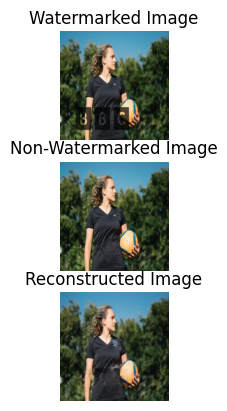

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 52, generator loss: 2227.7500817775726, discriminator loss: 2060.8600479364395


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 53, generator loss: 2234.355932235718, discriminator loss: 2065.512485265732


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 54, generator loss: 2238.6399594545364, discriminator loss: 2069.5828173160553


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 55, generator loss: 2248.2392859458923, discriminator loss: 2075.115173101425


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 56, generator loss: 2255.9663174152374, discriminator loss: 2080.625570654869


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 57, generator loss: 2263.8082337379456, discriminator loss: 2086.0276042222977


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 58, generator loss: 2271.5946353673935, discriminator loss: 2091.19102370739


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 59, generator loss: 2275.8642102479935, discriminator loss: 2094.6964758634567


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 60, generator loss: 2285.144622564316, discriminator loss: 2099.504477620125


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 61, generator loss: 2290.1871322393417, discriminator loss: 2102.508159160614


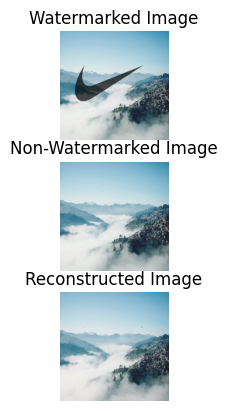

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 62, generator loss: 2296.0163967609406, discriminator loss: 2106.788251042366


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 63, generator loss: 2300.3115112781525, discriminator loss: 2109.7501966953278


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 64, generator loss: 2309.271756052971, discriminator loss: 2114.8576667308807


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 65, generator loss: 2313.3338646888733, discriminator loss: 2118.357255220413


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 66, generator loss: 2320.8033559322357, discriminator loss: 2122.962738633156


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 67, generator loss: 2327.2251715660095, discriminator loss: 2127.063654780388


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 68, generator loss: 2334.49334025383, discriminator loss: 2131.5619082450867


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 69, generator loss: 2339.5279104709625, discriminator loss: 2135.228285074234


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 70, generator loss: 2343.6798148155212, discriminator loss: 2138.2035789489746


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 71, generator loss: 2349.696512699127, discriminator loss: 2141.1009595394135


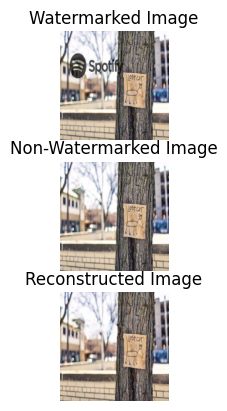

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 72, generator loss: 2353.2293815612793, discriminator loss: 2143.6126853227615


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 73, generator loss: 2359.2707258462906, discriminator loss: 2147.2637201547623


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 74, generator loss: 2361.870403289795, discriminator loss: 2149.3421065807343


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 75, generator loss: 2369.0115530490875, discriminator loss: 2153.315588951111


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 76, generator loss: 2372.4978712797165, discriminator loss: 2155.984586596489


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 77, generator loss: 2380.2264862060547, discriminator loss: 2160.041088461876


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 78, generator loss: 2383.057163000107, discriminator loss: 2161.663074016571


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 79, generator loss: 2385.2315126657486, discriminator loss: 2164.018311858177


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 80, generator loss: 2392.120321750641, discriminator loss: 2166.5492362976074


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 81, generator loss: 2397.4159277677536, discriminator loss: 2169.583172440529


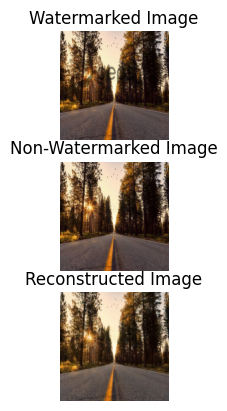

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 82, generator loss: 2400.752826333046, discriminator loss: 2171.9802770614624


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 83, generator loss: 2404.723481297493, discriminator loss: 2174.4564802646637


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 84, generator loss: 2406.0035886764526, discriminator loss: 2175.804993391037


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 85, generator loss: 2413.119898080826, discriminator loss: 2179.1317974328995


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 86, generator loss: 2414.548012495041, discriminator loss: 2181.33529984951


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 87, generator loss: 2421.700380206108, discriminator loss: 2184.0964641571045


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 88, generator loss: 2423.8550300598145, discriminator loss: 2186.411564350128


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 89, generator loss: 2431.1117658615112, discriminator loss: 2189.4012516736984


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 90, generator loss: 2435.7883137464523, discriminator loss: 2192.931555747986


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 91, generator loss: 2439.387077331543, discriminator loss: 2195.6701939105988


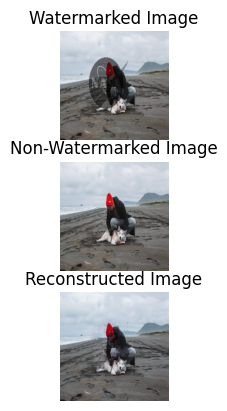

  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 92, generator loss: 2446.522712945938, discriminator loss: 2198.8114570379257


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 93, generator loss: 2446.1967772245407, discriminator loss: 2200.0917501449585


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 94, generator loss: 2452.3137551546097, discriminator loss: 2202.782770872116


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 95, generator loss: 2456.4199281930923, discriminator loss: 2205.1755521297455


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 96, generator loss: 2460.1119993925095, discriminator loss: 2207.603173494339


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 97, generator loss: 2464.8615522384644, discriminator loss: 2210.519921898842


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 98, generator loss: 2469.475098490715, discriminator loss: 2212.763139486313


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 99, generator loss: 2474.4316647052765, discriminator loss: 2215.645914912224


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 100, generator loss: 2479.223799228668, discriminator loss: 2218.8707404136658


  0%|          | 0/1567 [00:00<?, ?it/s]

Epoch 101, generator loss: 2480.3724933862686, discriminator loss: 2220.1950376033783


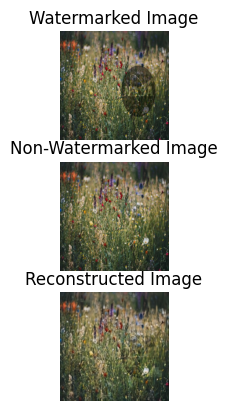

In [3]:
train_gen_loss = []
train_dis_loss = []
for epoch in range(num_epochs):
    gen_loss = 0
    dis_loss = 0
    generator.train()
    discriminator.train()

    # loop over the batches in the dataset
    for batch_idx, (nwm, wm) in tqdm(enumerate(loader), total=len(loader)):

        nwm = nwm.to(device)
        wm = wm.to(device)

        # update the discriminator
        discriminator_optimizer.zero_grad()
        
        # generate fake images
        fake_images = generator(wm)

        # calculate the discriminator outputs for real and fake images
        real_outputs = discriminator(nwm)
        fake_outputs = discriminator(fake_images.detach())

        # calculate the loss for the discriminator
        discriminator_loss = vwgan_loss(pixel_network, real_outputs, fake_outputs, fake_images, wm)

        # backpropagate and update the discriminator parameters
        discriminator_loss.backward(retain_graph=True)
        discriminator_optimizer.step()

        # update the generator
        generator_optimizer.zero_grad()

        # generate fake images
        fake_images = generator(wm)

        # calculate the discriminator outputs for fake images
        fake_outputs = discriminator(fake_images)

        # calculate the loss for the generator
        generator_loss = vwgan_loss(pixel_network, real_outputs, fake_outputs, fake_images, nwm)

        # backpropagate and update the generator parameters
        generator_loss.backward(retain_graph=True)
        generator_optimizer.step()

        dis_loss+=discriminator_loss.item()
        gen_loss+=generator_loss.item()

    # evaluate the model on the validation set
    generator.eval()
    discriminator.eval()
    print(f'Epoch {epoch+1}, generator loss: {gen_loss}, discriminator loss: {dis_loss}')
    train_gen_loss.append(gen_loss)
    train_dis_loss.append(dis_loss)

    # save the generator and discriminator models
    torch.save(generator.state_dict(), gen_save)
    torch.save(discriminator.state_dict(), dis_save)
    if epoch % 10 ==0:
        with torch.no_grad():
            # get the first batch of data from the validation loader
            nwm, wm = next(iter(val_loader))
            nwm = nwm.to(device)
            wm = wm.to(device)
            tensor_image = generator.forward(wm)
            wm = np.moveaxis(wm.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            nwm = np.moveaxis(nwm.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            tensor_image = np.moveaxis(tensor_image.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            

            f, ax = plt.subplots(3, 1)

            ax[0].imshow(wm)
            ax[0].set_title('Watermarked Image')
            ax[0].axis('off')
            ax[1].imshow(nwm)
            ax[1].set_title('Ground Truth')
            ax[1].axis('off')
            ax[2].imshow(tensor_image)
            ax[2].set_title('Reconstructed Image')
            ax[2].axis('off')
            plt.show()
    

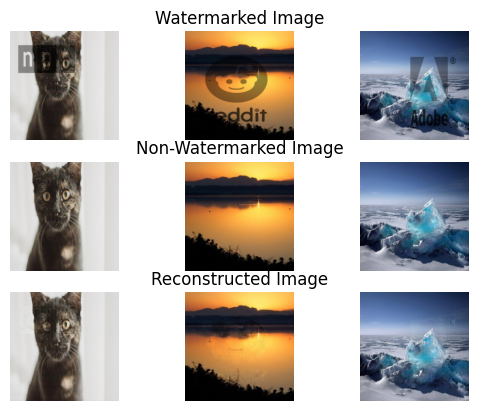

In [35]:
generator = Generator().to(device)
generator.load_state_dict(torch.load('generator_fixed_loss_1.pt'))

with torch.no_grad():
            # get the first batch of data from the validation loader
            nwm, wm = next(iter(val_loader))
            nwm = nwm.to(device)
            wm = wm.to(device)
            tensor_image = generator(wm)
            wm = np.moveaxis(wm.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            nwm = np.moveaxis(nwm.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            tensor_image = np.moveaxis(tensor_image.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))

            nwm2, wm2 = next(iter(val_loader))
            nwm2 = nwm2.to(device)
            wm2 = wm2.to(device)
            tensor_image2 = generator(wm2)
            wm2 = np.moveaxis(wm2.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            nwm2 = np.moveaxis(nwm2.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            tensor_image2 = np.moveaxis(tensor_image2.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))

            nwm3, wm3 = next(iter(val_loader))
            nwm3 = nwm3.to(device)
            wm3 = wm3.to(device)
            tensor_image3 = generator(wm3)
            wm3 = np.moveaxis(wm3.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            nwm3 = np.moveaxis(nwm3.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))
            tensor_image3 = np.moveaxis(tensor_image3.cpu().numpy()[0, ...], (0, 1, 2), (2, 0, 1))


            f, ax = plt.subplots(3, 3)

            ax[0,0].imshow(wm)
            ax[0,1].set_title('Watermarked Image')
            ax[0,0].axis('off')
            ax[1,0].imshow(nwm)
            ax[1,1].set_title('Ground Truth')
            ax[1,0].axis('off')
            ax[2,0].imshow(tensor_image)
            ax[2,1].set_title('Reconstructed Image')
            ax[2,0].axis('off')

            ax[0,1].imshow(wm2)
            ax[0,1].set_title('Watermarked Image')
            ax[0,1].axis('off')
            ax[1,1].imshow(nwm2)
            ax[1,1].set_title('Ground Truth')
            ax[1,1].axis('off')
            ax[2,1].imshow(tensor_image2)
            ax[2,1].set_title('Reconstructed Image')
            ax[2,1].axis('off')

            ax[0,2].imshow(wm3)
            ax[0,1].set_title('Watermarked Image')
            ax[0,2].axis('off')
            ax[1,2].imshow(nwm3)
            ax[1,1].set_title('Ground Truth')
            ax[1,2].axis('off')
            ax[2,2].imshow(tensor_image3)
            ax[2,1].set_title('Reconstructed Image')
            ax[2,2].axis('off')


            plt.show()

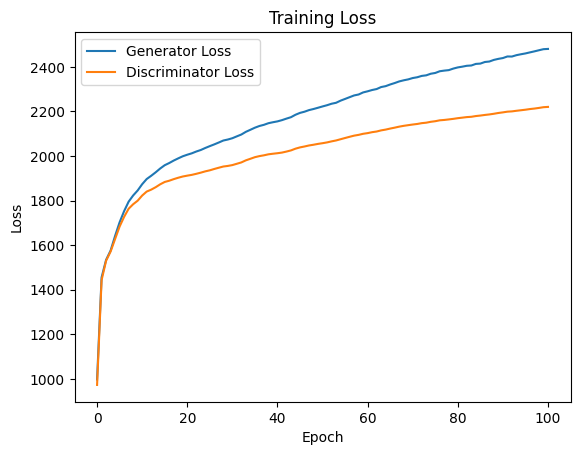

In [5]:
import matplotlib.pyplot as plt

# plot generator and discriminator loss
plt.plot(train_gen_loss, label='Generator Loss')
plt.plot(train_dis_loss, label='Discriminator Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()